<a href="https://colab.research.google.com/github/ErikaGrandy/EECS3401/blob/main/A2_Erika_Grandy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EECS3401 - Assignment 2
## Erika Grandy, 217300948

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TASK 1
## Import Adult Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# TASK 2
## Look at Data Structure
- Use .head() to view first 5 rows.
- Use .info() to view column datatypes, non-null count, etc.
- Use .describe() to view a summary about counts, mean, min, max, etc.
- Use .shape() to view dimension of dataframe.

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [ ]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X.shape

(48842, 14)

## TASK 2.1
### Plot a Histogram
#### Note: The histogram only makes a plot for the numerical (int64) data, hence only 6 plots.

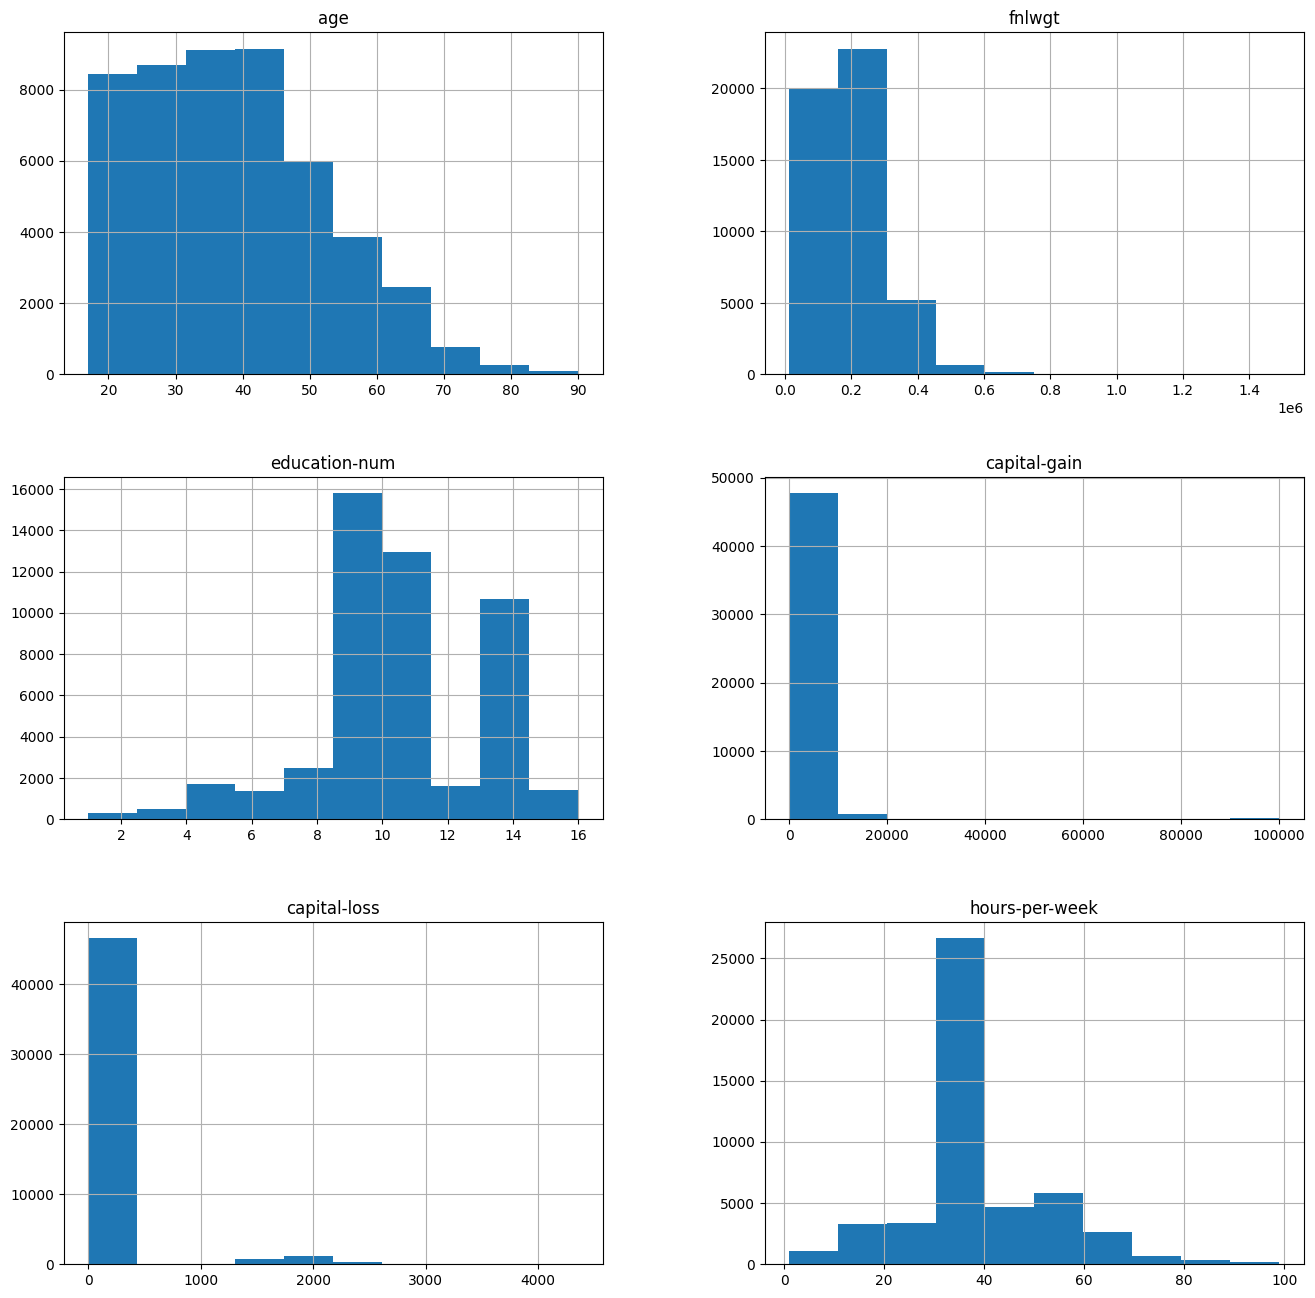

In [ ]:
X.hist(figsize=(16,16))
plt.show()

# TASK 3
## Count the number of missing values ('?')

In [ ]:
X.isin(['?']).sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

# Task 4
## Replace missing values (?) with null (NaN)

In [ ]:
X = X.replace('?', np.nan) #Replace all question marks with NaN
X.info() #Display info again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


# Task 5
## Create & Apply preprocessing pipline to:



1.   Use SimpleImputer to replace missing numerical values with the mean
2.   Use StandardScaler to scale numerical columns
3.   Use SimpleImputer to replace missing categorial with most frequent value.
4.   Encode categorical columns using OneHotEncoder





In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split into numerical columns and categorical columns
numerical_columns = X.select_dtypes(include='number').columns.to_list()
categorical_columns = X.select_dtypes(exclude='number').columns.to_list()

# Numerical pipeline - Use SimpleInputer to replace missing w/ mean, then scale.
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Categorical pipeline - Use SimpleImputer to replace missing w/ most frequent,
# then OneHot encode to turn into numerical values.
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

preprocess = ColumnTransformer([
                                ('Numerical', numerical_pipeline, numerical_columns),
                                ('Categorical', categorical_pipeline, categorical_columns)],
                               )
preprocess

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [ ]:
X_prepared = preprocess.fit_transform(X) #Prepare X by feeding through preprocess

# Feeding through preprocess converts dataframe into numpy array + removes headers.
# The below code adds headers back and then casts back to a pandas DataFrame
feature_names=preprocess.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared.shape # View shape after preprocess. Results in more columns due to OneHot

(48842, 105)

# Task 6
## Check target value_counts
#### Note the data needs cleaning, as some of the targets end in periods.

In [ ]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

# Task 7
## Remove periods in >50K. and <=50K.

In [ ]:
y = y.replace('>50K.', '>50K') # Replace all >50K. with >50K
y = y.replace('<=50K.', '<=50K') # Replace all <=50K. with <=50K
y.value_counts()

income
<=50K     37155
>50K      11687
dtype: int64

# Task 8
## Split data in 80% training set and 20% testing set

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% training and 20% testing, then view shape
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


# Task 9
## Train an SVM model
#### Use polynomial kernal, with C=0.1 and gamma=1

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='poly', C=0.1, gamma=1) # Create SVM model
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel()) # Train model on first 10,000 samples

SVC(C=0.1, gamma=1, kernel='poly')

# Task 9.1
### Test model on X_Test and report classification report

In [ ]:
from sklearn.metrics import classification_report

y_predict = model_svm.predict(X_test) # Test the created model on the test set
print(classification_report(y_test, y_predict)) # Compare to models target prediction to actual target

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      7421
        >50K       0.61      0.58      0.59      2348

    accuracy                           0.81      9769
   macro avg       0.74      0.73      0.73      9769
weighted avg       0.81      0.81      0.81      9769



# Task 9.2
## Display Confusion Matrix

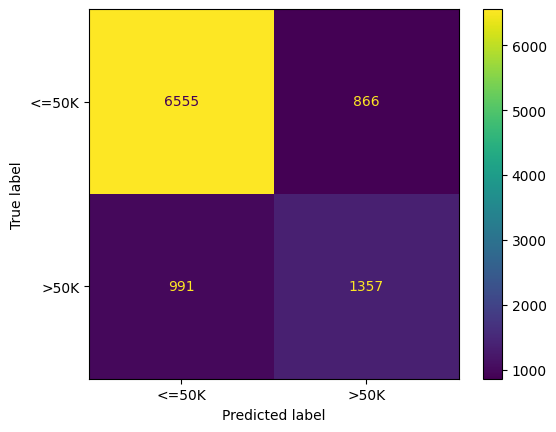

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict) # Confusion matrix

# Task 10.1
## Split dataset into 60% training, 20% validation, 20% testing

In [ ]:

# Split data into 60%, 40%. The 60% will be the training set.
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

# Split the previous 40% section into 50/50, resulting in 20% validation and 20% testing
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


# Task 10.2
### Pass hyperparameters for GridSearchCV
### Check winner parameters

In [ ]:
# Code Author: luisguiserrano
# Note (Takes about 7-8min to complete the fit)

from sklearn.model_selection import GridSearchCV

# Pass following
svm_parameters = {'kernel':['rbf'],
                   'C':[0.01,0.1,1,10],
                   'gamma':[0.01,1,10]}

svm=SVC()
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel()) # Fit on first 10,000 samples

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

svm_winner

SVC(C=10, gamma=0.01)